# Exercícios - Probabilidade

### Questão 1

Um teste para COVID-19 possui uma taxa de 5% de falso positivo e 1% de falso negativo, ou seja, em 5% dos não-infectados acusa como infectados, e em 1% dos infectados acusa como não infectados. Sabendo que atualmente 1% da população está infectada, calcule a probabilidade de um paciente cujo teste apontou positivo estar realmente infectado.

In [1]:
#Bibliotecas utilizadas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy import stats
import pandas as pd

In [2]:
a = 0.01
a_ = 0.99
b_a = 0.99
b_a_ = 0.05
(a*b_a) / ((a*b_a) + (a_*b_a_))

0.16666666666666669

Um certo vírus infecta uma em
cada 200 pessoas. Um teste usado para detectar o vírus
em uma pessoa dá positivo 80% das vezes quando a pessoa tem o vírus e 5% das vezes quando a pessoa não
tem o vírus. (Este resultado de 5% é chamado de falso
positivo.) Seja A o evento “a pessoa está infectada” e B
o evento “o teste dá positivo”.
(a) Usando o teorema de Bayes, se o teste dá positivo, determine a probabilidade de a pessoa estar
infectada.
(b) Usando o teorema de Bayes, se o teste dá negativo, determine a probabilidade de a pessoa não estar
infectada

In [3]:
# (a)

a = 1/200
a_ = 1 - a
b_a = 0.8 
b_a_ = 0.05
(a*b_a) / ((a*b_a) + (a_*b_a_))

0.07441860465116279

In [4]:
# (b)

a = 1 - 1/200
a_ = 1/200
b_a = 0.95 
b_a_ = 0.2
(a*b_a) / ((a*b_a) + (a_*b_a_))

0.9989431968295905

### Questão 2

A probabilidade de dado honesto é conhecido e igual a $1/6$, mas quando vamos testar isso com um dado físico, não necessariamente vai cair uma vez cada face do dado (se eu lançar ele 6 vezes). A ideia é que conforme fazermos vários testes a tendência é que a probabilidade de cada face irá convergir pro valor esperado. 

Vamos testar este conceito utilizando da programação seguintes os itens abaixo:]

__A)__ Desenvolva uma função que receba um valor n, onde n é a quantidade de elementos e o objetivo da função é retorna uma _Series_ com n elementos sendo esses elementos números variando de 1 e 6;

__B)__ Teste a função para n igual a 10, 100, 1.000, 10.000 e 100.000 casos e para cada um deles calcule a proporção de vezes que aparece cada número;

__DIca.:__ utilize a função do _Pandas_ `.value_counts`

__C)__ O que podermos dizer sobre a afirmação do enunciado, a tendência é que as probabilidades irâo convergir para $1/6$?

In [5]:
import numpy as np
import pandas as pd
def dado(n):

    v_10 = pd.DataFrame(np.random.randint(1,7,size=n))
    freq_table = pd.concat([v_10.value_counts(),
                        round(v_10.value_counts(normalize = True),3),
                        round(v_10.value_counts(normalize = True),3)* 100,
                        (round(v_10.value_counts(normalize = True),3)* 100).cumsum()],
                       axis = 1,
                       keys = ("freq", "freq_relativa", 'freq_percentual', 'freq_acumulada' ), names=['Resultado vezes'])
    return freq_table


In [6]:
dado(1000)

Resultado vezes,freq,freq_relativa,freq_percentual,freq_acumulada
0,,,,
2,170,0.170,17.0,17.0
6,170,0.170,17.0,34.0
5,169,0.169,16.9,50.9
1,167,0.167,16.7,67.6
4,165,0.165,16.5,84.1
3,159,0.159,15.9,100.0


In [7]:
def conta_face_dado(n):
    '''n [list]: how many times to play dice
    '''
    df = pd.DataFrame(index=[1,2,3,4,5,6])
    for i in n:
        temp = pd.DataFrame({'amostra':np.random.randint(low=1, high=7, size=i)})
        df[i] = temp['amostra'].value_counts(normalize=True).sort_index()*100

    return df

In [8]:
def prob_dado(n):
    lista = []
    for i in range(n):
        x = 1+ randint(0,n) % 6
        lista.append(x)
    return pd.Series(lista)

### Questão 3

Na casa de Luiza e Rafael tem um pote de balas de diferentes cores. Certo dia a mamãe deles contou quantas balas tinha de cada uma das cores:

- 14 balas azuis;
- 22 balas vermelhas;
- 17 balas amarelas.

A mamãe deles deixou que cada um pegasse 3 balas começando pela Luiza e depois o Rafael. Dado isso resolva os item abaixo:

__A)__ Qual a probabilidade da Luiza pegar uma bala de cada na ordem da contagem e o Rafael pegar 2 azuis e uma vermelha, dado que é um evento sem reposição?

__B)__ Luiza decidiu ficar só com a bala amarela e devolveu as demais para o pote antes que o Rafael pegasse suas balas. Como que ficaria a probabilidade para o Rafael agora?

In [9]:
14+22+17

53

In [10]:
14/53 * 22/52 * 17/51

0.03725205611998065

In [11]:
13/50 * 12/49 * 21/48

0.027857142857142858

In [12]:
14/52 * 13/51 * 22/50

0.030196078431372553

### Questão 4

Um programa de computador gera uma pontuação aleatória para cada usuário, sendo que:

- Em 1/2 dos casos, gera 0.5;
- Em 1/4 dos casos, gera 0.25;
- Em 1/8 dos casos, gera 0.125.

E essa lógica segue assim por diante. Resolva os itens a seguir:

__A)__ Calcule o __valor esperado__ utilizando apenas os 3 primeiros casos;

__B)__ Faça um _loop_ para calcular o __valor esperado__ para 100 casos e avalie se só com os 3 primeiros casos temos uma boa aproximação ou não.

In [13]:
#Calculando a Esperança e a variância

p = [1/2, 1/4, 1/8]

X = [0.5, 0.25, 0.125]

#Calculando a esperança de X
esperanca = 0
for i in range(len(X)):
    esperanca += p[i]*X[i]

print(f'Esperança =  {esperanca}')

#Calculando a variância de X
#Primeira maneira    
variancia = 0
for i in range(len(X)):
    variancia += p[i]*(X[i] - esperanca)**2

print(f'Var(X) = {variancia}')

#Segunda maneira
variancia = 0
ex2 = 0
for i in range(len(X)):
    ex2 += p[i]*(X[i])**2

variancia = ex2 - (esperanca)**2
print(f'Var(X) = {variancia}')
print(f'Dp(X) ={np.sqrt(variancia):.2f}')

Esperança =  0.328125
Var(X) = 0.021453857421875
Var(X) = 0.034912109375
Dp(X) =0.19


In [14]:
sum(p), sum(X)

(0.875, 0.875)

In [15]:
list_p =[]
list_x = []
#x = 0.5
for i in range(1,100):
    list_p.append(1/2**i)
    list_x.append(0.5**i)
p = list_p

X = list_x

#Calculando a esperança de X
esperanca = 0
for i in range(len(X)):
    esperanca += p[i]*X[i]

print(f'Esperança =  {esperanca}')

#Calculando a variância de X
#Primeira maneira    
variancia = 0
for i in range(len(X)):
    variancia += p[i]*(X[i] - esperanca)**2

print(f'Var(X) = {variancia}')

#Segunda maneira
variancia = 0
ex2 = 0
for i in range(len(X)):
    ex2 += p[i]*(X[i])**2

variancia = ex2 - (esperanca)**2
print(f'Var(X) = {variancia}')
print(f'Dp(X) ={np.sqrt(variancia):.2f}')

Esperança =  0.3333333333333333
Var(X) = 0.03174603174603174
Var(X) = 0.031746031746031744
Dp(X) =0.18


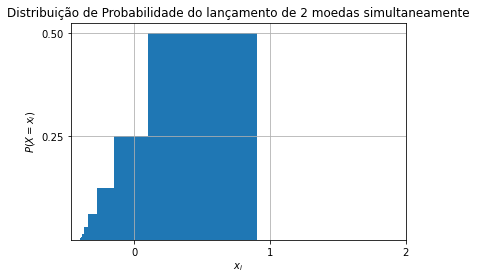

In [16]:
plt.bar(x= list_x, height=list_p)
plt.title('Distribuição de Probabilidade do lançamento de 2 moedas simultaneamente')
plt.ylabel(r'$P(X=x_i)$')
plt.xlabel(r'$x_i$')
plt.xticks([0,1,2])
plt.yticks([1/4,1/2])
plt.grid()
plt.show()

In [17]:
sum(list_x)

1.0

In [18]:
sum(list_p)

1.0

In [19]:
np.mean(list_x)

0.010101010101010102

In [20]:
np.std(list_x)

0.05713994191406444

In [21]:
len(np.unique(list_x))

99

In [22]:
df = pd.DataFrame(list_x)

In [23]:
df.describe()

,0
count,9.900000e+01
mean,1.010101e-02
std,5.743073e-02
min,1.577722e-30
25%,3.970467e-23
50%,8.881784e-16
75%,2.235174e-08
max,5.000000e-01


In [24]:
df.value_counts()

1.577722e-30    1
2.980232e-08    1
7.450581e-09    1
3.725290e-09    1
1.862645e-09    1
               ..
1.694066e-21    1
8.470329e-22    1
4.235165e-22    1
2.117582e-22    1
5.000000e-01    1
Length: 99, dtype: int64

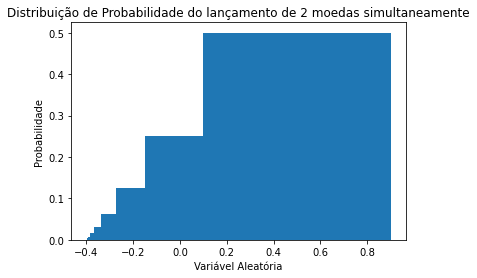

In [25]:
plt.bar(x=list_x, height=list_x)
plt.title('Distribuição de Probabilidade do lançamento de 2 moedas simultaneamente')
plt.ylabel('Probabilidade')
plt.xlabel('Variável Aleatória')
plt.show()

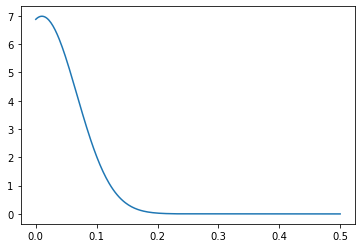

In [26]:
x = np.linspace(0.5, 1.577722e-30, 300)

mu = 0.010101010101010102 #média
sigma = 0.05713994191406444 #desvio padrão
# usando o scipy
y = stats.norm(loc=mu, scale=sigma).pdf(x) #probability density function (pdf)

plt.plot(x, y)

plt.show()

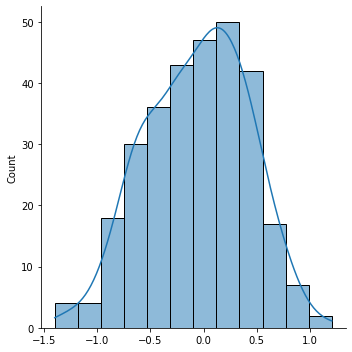

In [27]:
# utilizando o seaborn

N = 300 #número de pontos a serem escolhidos aleatoriamente
amostra_normal = np.random.normal(0.0, 0.5,N) 

sns.displot(amostra_normal, kde=True)
plt.show()

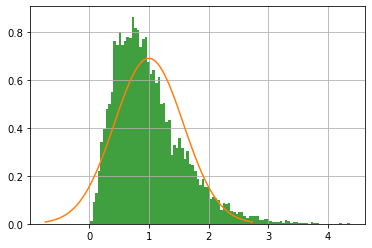

In [28]:
# sample_from_exp_dist.py
# import the module
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.stats as stats
random.seed(54312)

# select the sample size you want to take
sample_size = 3
# select the number of sample mean you want to simulate
calc_means = 10000

mean_list = []

# run our loop and collect a sample
for j in range(calc_means):
    # initialize the variables to track our results
    sample_list = []
    for i in range(sample_size):
        draw = np.random.exponential(1)
        sample_list.append(draw)
    sample_mean = sum(sample_list) / sample_size
    mean_list.append(sample_mean)

# create a histogram of our sample and compare it to what the CLT says it should be
n, bins, patches = plt.hist(mean_list, math.floor(math.sqrt(calc_means)), density=True, facecolor='g', alpha=0.75)
plt.grid(True)
mu = 1
sigma = 1 / (math.sqrt(sample_size))
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

### Questão 5

Em um programa de auditório, havia 3 portas (A, B, C), dentro da qual uma continha um prêmio. O participante escolheu a porta A e antes de abrir a porta o apresentador abriu a porta C, na qual não havia nada. O participante aumentará a probabilidade de acertar a porta caso mude a escolha dele da porta A para a B?

Sim!